In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
dataset_train = pd.read_csv("Google_Stock_Price_Train.csv")
dataset_train

,Date,Open,High,Low,Close,Volume
0,01-03-2012,325.25,332.83,324.97,663.59,"73,80,500"
1,01-04-2012,331.27,333.87,329.08,666.45,"57,49,400"
2,01-05-2012,329.83,330.75,326.89,657.21,"65,90,300"
3,01-06-2012,328.34,328.77,323.68,648.24,"54,05,900"
4,01-09-2012,322.04,322.29,309.46,620.76,"1,16,88,800"
...,...,...,...,...,...,...
1253,12/23/2016,790.90,792.74,787.28,789.91,"6,23,400"
1254,12/27/2016,790.68,797.86,787.66,791.55,"7,89,100"
1255,12/28/2016,793.70,794.23,783.20,785.05,"11,53,800"
1256,12/29/2016,783.33,785.93,778.92,782.79,"7,44,300"


In [3]:
train_set = dataset_train.iloc[:,1:2].values
train_set

array([[325.25],
       [331.27],
       [329.83],
       ...,
       [793.7 ],
       [783.33],
       [782.75]])

In [4]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
scaled_training = sc.fit_transform(train_set)

In [5]:
scaled_training

array([[0.08581368],
       [0.09701243],
       [0.09433366],
       ...,
       [0.95725128],
       [0.93796041],
       [0.93688146]])

In [6]:
x_train = []
y_train = []

In [7]:
for i in range(10,1258):
    x_train.append(scaled_training[i-10:i,0])
    y_train.append(scaled_training[i,0])

In [8]:
x_train, y_train = np.array(x_train), np.array(y_train)

In [9]:
x_train.shape

(1248, 10)

In [10]:
y_train.shape

(1248,)

In [11]:
print(x_train.ndim, y_train.ndim)

2 1


In [12]:
x_train = np.reshape(x_train,(1248,10,1))

In [13]:
x_train.shape

(1248, 10, 1)

In [14]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout

In [15]:
model = Sequential()
model.add(LSTM(units=10, return_sequences=True, input_shape=(10,1)))
model.add(Dropout(0.2))
model.add(LSTM(units=10, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=10, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=10))
model.add(Dropout(0.2))
model.add(Dense(units=1))
model.compile("rmsprop", loss="mean_squared_error")
model.fit(x_train, y_train, epochs=500)

Epoch 1/500
39/39 [==============================] - 4s 10ms/step - loss: 0.0824
Epoch 2/500
39/39 [==============================] - 0s 10ms/step - loss: 0.0197
Epoch 3/500
39/39 [==============================] - 0s 11ms/step - loss: 0.0150
Epoch 4/500
39/39 [==============================] - 0s 10ms/step - loss: 0.0138
Epoch 5/500
39/39 [==============================] - 0s 10ms/step - loss: 0.0134
Epoch 6/500
39/39 [==============================] - 0s 9ms/step - loss: 0.0112
Epoch 7/500
39/39 [==============================] - 0s 10ms/step - loss: 0.0102
Epoch 8/500
39/39 [==============================] - 0s 10ms/step - loss: 0.0094
Epoch 9/500
39/39 [==============================] - 0s 10ms/step - loss: 0.0092
Epoch 10/500
39/39 [==============================] - 0s 9ms/step - loss: 0.0088
Epoch 11/500
39/39 [==============================] - 0s 10ms/step - loss: 0.0079
Epoch 12/500
39/39 [==============================] - 0s 9ms/step - loss: 0.0069
Epoch 13/500
39/39 [========

39/39 [==============================] - 0s 10ms/step - loss: 0.0035
Epoch 102/500
39/39 [==============================] - 0s 10ms/step - loss: 0.0038
Epoch 103/500
39/39 [==============================] - 0s 10ms/step - loss: 0.0035
Epoch 104/500
39/39 [==============================] - 0s 10ms/step - loss: 0.0035
Epoch 105/500
39/39 [==============================] - 0s 10ms/step - loss: 0.0036
Epoch 106/500
39/39 [==============================] - 0s 10ms/step - loss: 0.0038
Epoch 107/500
39/39 [==============================] - 0s 10ms/step - loss: 0.0034
Epoch 108/500
39/39 [==============================] - 0s 10ms/step - loss: 0.0035
Epoch 109/500
39/39 [==============================] - 0s 10ms/step - loss: 0.0033
Epoch 110/500
39/39 [==============================] - 0s 10ms/step - loss: 0.0035
Epoch 111/500
39/39 [==============================] - 0s 10ms/step - loss: 0.0034
Epoch 112/500
39/39 [==============================] - 0s 10ms/step - loss: 0.0037
Epoch 113/500
39/3

39/39 [==============================] - 0s 10ms/step - loss: 0.0031
Epoch 200/500
39/39 [==============================] - 0s 9ms/step - loss: 0.0030
Epoch 201/500
39/39 [==============================] - 0s 10ms/step - loss: 0.0030
Epoch 202/500
39/39 [==============================] - 0s 10ms/step - loss: 0.0033
Epoch 203/500
39/39 [==============================] - 0s 10ms/step - loss: 0.0029
Epoch 204/500
39/39 [==============================] - 0s 10ms/step - loss: 0.0030
Epoch 205/500
39/39 [==============================] - 0s 10ms/step - loss: 0.0032
Epoch 206/500
39/39 [==============================] - 0s 10ms/step - loss: 0.0031
Epoch 207/500
39/39 [==============================] - 0s 10ms/step - loss: 0.0031
Epoch 208/500
39/39 [==============================] - 0s 10ms/step - loss: 0.0033
Epoch 209/500
39/39 [==============================] - 0s 10ms/step - loss: 0.0031
Epoch 210/500
39/39 [==============================] - 0s 10ms/step - loss: 0.0031
Epoch 211/500
39/39

39/39 [==============================] - 0s 10ms/step - loss: 0.0028
Epoch 298/500
39/39 [==============================] - 0s 10ms/step - loss: 0.0029
Epoch 299/500
39/39 [==============================] - 0s 10ms/step - loss: 0.0031
Epoch 300/500
39/39 [==============================] - 0s 10ms/step - loss: 0.0027
Epoch 301/500
39/39 [==============================] - 0s 10ms/step - loss: 0.0030
Epoch 302/500
39/39 [==============================] - 0s 10ms/step - loss: 0.0027
Epoch 303/500
39/39 [==============================] - 0s 10ms/step - loss: 0.0030
Epoch 304/500
39/39 [==============================] - 0s 10ms/step - loss: 0.0028
Epoch 305/500
39/39 [==============================] - 0s 9ms/step - loss: 0.0029
Epoch 306/500
39/39 [==============================] - 0s 10ms/step - loss: 0.0029
Epoch 307/500
39/39 [==============================] - 0s 10ms/step - loss: 0.0026
Epoch 308/500
39/39 [==============================] - 0s 10ms/step - loss: 0.0029
Epoch 309/500
39/39

39/39 [==============================] - 0s 10ms/step - loss: 0.0026
Epoch 396/500
39/39 [==============================] - 0s 10ms/step - loss: 0.0027
Epoch 397/500
39/39 [==============================] - 0s 10ms/step - loss: 0.0026
Epoch 398/500
39/39 [==============================] - 0s 10ms/step - loss: 0.0028
Epoch 399/500
39/39 [==============================] - 0s 10ms/step - loss: 0.0026
Epoch 400/500
39/39 [==============================] - 0s 10ms/step - loss: 0.0027
Epoch 401/500
39/39 [==============================] - 0s 10ms/step - loss: 0.0028
Epoch 402/500
39/39 [==============================] - 0s 9ms/step - loss: 0.0029
Epoch 403/500
39/39 [==============================] - 0s 10ms/step - loss: 0.0025
Epoch 404/500
39/39 [==============================] - 0s 10ms/step - loss: 0.0026
Epoch 405/500
39/39 [==============================] - 0s 9ms/step - loss: 0.0028
Epoch 406/500
39/39 [==============================] - 0s 10ms/step - loss: 0.0027
Epoch 407/500
39/39 

39/39 [==============================] - 0s 10ms/step - loss: 0.0029
Epoch 495/500
39/39 [==============================] - 0s 10ms/step - loss: 0.0026
Epoch 496/500
39/39 [==============================] - 0s 10ms/step - loss: 0.0025
Epoch 497/500
39/39 [==============================] - 0s 10ms/step - loss: 0.0028
Epoch 498/500
39/39 [==============================] - 0s 11ms/step - loss: 0.0028
Epoch 499/500
39/39 [==============================] - 0s 10ms/step - loss: 0.0026
Epoch 500/500
39/39 [==============================] - 0s 10ms/step - loss: 0.0024


In [16]:
dataset_test = pd.read_csv("Google_Stock_Price_Test.csv")
y_test = dataset_test.iloc[:,1:2]

In [17]:
y_test

,Open
0,778.81
1,788.36
2,786.08
3,795.26
4,806.40
5,807.86
6,805.00
7,807.14
8,807.48
9,807.08


In [18]:
dataset_total = pd.concat((dataset_train["Open"], dataset_test["Open"]), axis=0)
inputs = dataset_total[len(dataset_total)-len(dataset_test)-10:].values

In [19]:
inputs = inputs.reshape(-1,1)

In [20]:
inputs = sc.fit_transform(inputs)

In [21]:
inputs

array([[0.3659322 ],
       [0.19338983],
       [0.30423729],
       [0.28864407],
       [0.22966102],
       [0.20491525],
       [0.20118644],
       [0.25237288],
       [0.07661017],
       [0.06677966],
       [0.        ],
       [0.16186441],
       [0.12322034],
       [0.27881356],
       [0.46762712],
       [0.49237288],
       [0.44389831],
       [0.48016949],
       [0.4859322 ],
       [0.47915254],
       [0.45762712],
       [0.4459322 ],
       [0.47627119],
       [0.4820339 ],
       [0.73711864],
       [0.86118644],
       [1.        ],
       [0.94745763],
       [0.60762712],
       [0.3059322 ]])

In [22]:
x_test = []

In [23]:
for i in range(10,30):
    x_test.append(inputs[i-10:i,0])

In [24]:
x_test = np.array(x_test)
x_test = np.reshape(x_test,(20,10,1))
x_test

array([[[0.3659322 ],
        [0.19338983],
        [0.30423729],
        [0.28864407],
        [0.22966102],
        [0.20491525],
        [0.20118644],
        [0.25237288],
        [0.07661017],
        [0.06677966]],

       [[0.19338983],
        [0.30423729],
        [0.28864407],
        [0.22966102],
        [0.20491525],
        [0.20118644],
        [0.25237288],
        [0.07661017],
        [0.06677966],
        [0.        ]],

       [[0.30423729],
        [0.28864407],
        [0.22966102],
        [0.20491525],
        [0.20118644],
        [0.25237288],
        [0.07661017],
        [0.06677966],
        [0.        ],
        [0.16186441]],

       [[0.28864407],
        [0.22966102],
        [0.20491525],
        [0.20118644],
        [0.25237288],
        [0.07661017],
        [0.06677966],
        [0.        ],
        [0.16186441],
        [0.12322034]],

       [[0.22966102],
        [0.20491525],
        [0.20118644],
        [0.25237288],
        [0.07661017],
  

In [25]:
ypred = model.predict(x_test)
ypred.shape

(20, 1)

In [26]:
ypred = sc.inverse_transform(ypred)

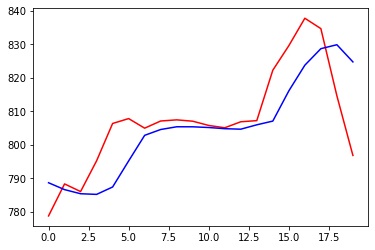

In [27]:
plt.plot(y_test, color="red", label="Actual Stock Price")
plt.plot(ypred, color="blue", label="Predicted Stock Price")
plt.show()

In [28]:
test = []
for i in range(10):
    test.append(i)

In [29]:
test = np.array(test)
test = test.reshape(-1,1)
test = np.reshape(test,(1,10,1))
test

array([[[0],
        [1],
        [2],
        [3],
        [4],
        [5],
        [6],
        [7],
        [8],
        [9]]])

In [30]:
yp = model.predict(test)
yp

array([[0.92617416]], dtype=float32)

In [31]:
yp = sc.inverse_transform(yp)
yp

array([[833.4543]], dtype=float32)

In [32]:
test =  [343,456,756,678,786,456,567,343,767,123]
print(len(test))
test = np.array(test)
test = test.reshape(-1,1)
test = np.reshape(test, (1,10,1))
yp = model.predict(test)
yp = sc.inverse_transform(yp)
print(yp)

10
[[833.49225]]
